In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

import jax
import jax.numpy as jnp

from rejectax import rejection_sampler, rejection_sampler_loop

In [2]:
# 1D standard normal
def target(x):
    return jax.scipy.stats.norm.pdf(x, loc = 0, scale = 1)

In [3]:
t0 = time.time()

z = rejection_sampler(
    key = jax.random.PRNGKey(0),
    target = target,
    lo = -5.0,
    hi = 5.0,
    n = 10_000,
    max_ratio = 5.0,
)

time.time() - t0

10.097661972045898

In [4]:
t0 = time.time()

zloop = rejection_sampler_loop(
    key = jax.random.PRNGKey(0),
    target = target,
    lo = -5.0,
    hi = 5.0,
    n = 10_000,
    max_ratio = 5.0,
    progress = True,
)

time.time() - t0

  0%|          | 0/10000 [00:00<?, ?it/s]

10.95900297164917

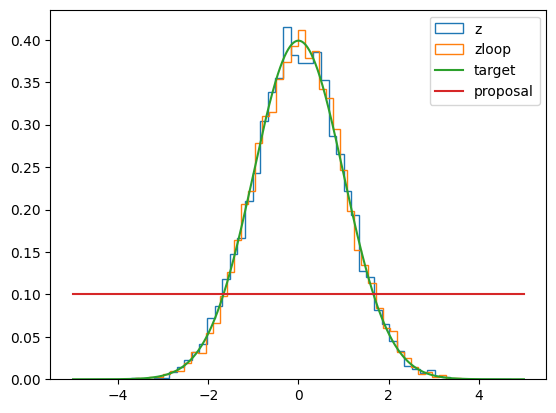

In [5]:
# therefore the samples do not represent the target
x = jnp.linspace(-5, 5, 1_000)
p = jax.vmap(target)(x)
plt.hist(z, bins = 50, density = True, histtype = 'step', label = 'z')
plt.hist(zloop, bins = 50, density = True, histtype = 'step', label = 'zloop')
plt.plot(x, p, label = 'target')
plt.plot(x, jnp.ones_like(x) * 0.1, label = 'proposal')
plt.legend()